# Q-Network for Cartpole
[Tutorial link](https://keon.io/deep-q-learning/)

In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import pdb
import torch
import torch.nn as nn
%matplotlib inline

from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython import display

gym.logger.set_level(40)
np.set_printoptions(precision=2)

In [19]:
def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    patch = plt.imshow(frames[0])
    plt.axis('off')
    
    def animate(i):
        patch.set_data(frames[i])
        
    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=50)
    display.display(display_animation(anim, default_mode='loop'))
    
def display_rewards(rewards):
    N = len(rewards)
    plt.plot(np.arange(N), rewards)
    plt.xlabel("Epoch")
    plt.ylabel("Reward")
    plt.title("Rewards")
    plt.show()

The state has four components: position, velocity, angle, angular_velocity.
x, x_prime, theta, theta_prime

Our Q-table will be a partition into two buckets of each of these, negative and positive.
So Q-table will have dimensions (2, 2, 2, 2, 2). The last dimension reflects the value of moving left/right.

In [6]:
class QNet(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc = nn.Sequential(
            nn.Linear(4, 24),
            nn.ReLU(),
            nn.Linear(24, 2)
        )
        
    def forward(self, x):
        return self.fc(x)
    
qnet = QNet()
print(qnet)

loss = 

QNet(
  (fc): Sequential(
    (0): Linear(in_features=4, out_features=24, bias=True)
    (1): ReLU()
    (2): Linear(in_features=24, out_features=2, bias=True)
  )
)


[37.0, 26.0, 31.0]


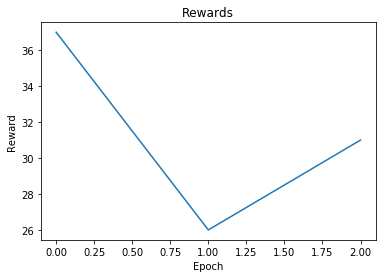

In [46]:
num_epochs = 3
game_length = 50

env = gym.make('CartPole-v0')
rewards = []
for epoch in range(num_epochs):
    observation = env.reset()
    cum_reward = 0
    for i in range(game_length):
        pred = qnet(torch.Tensor(observation))
        action = pred.argmax().item()
        new_observation, reward, done, info = env.step(action)
        observation = new_observation
        cum_reward += reward
#         print("Action: {}, Reward: {}".format(action, reward))
        if done:
            break
    rewards.append(cum_reward)

print(rewards)
display_rewards(rewards)